In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import style
plt.style.use('bmh')
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
import matplotlib.colors as colors
import control
from IPython import display
from collections import deque
import pickle
from Utilities.ParticleFilter import *
from Utilities.Dynamics_Constraints_Controller import *
from Utilities.cida import CIDA
import random
from scipy.linalg import sqrtm

saveFigs = True
FigWidth = 2.5
FigHeight = 2.5

In [2]:
theta = -np.pi+0.01
np.arctan2(np.sin(theta), np.cos(theta))

-3.1315926535897933

In [3]:
x0 = np.random.randn(rx,1)
x0[0] = 10
Cov0 = 0.2 * np.diag(np.ones(rx,))
num_particles = 300
Pred_Horizon_N = 8
number_of_simulations = 100
LangrangeMultp = 1000 / number_of_simulations
cida =  CIDA(x0, Cov0, num_particles, stateDynamics, measurementDynamics, Q, R,
                 Pred_Horizon_N, Controller, number_of_simulations, CostAndConstraints, LangrangeMultp)
cida.initialize(x0, Cov0)

RandomSearch method returns the desired control input, according to CIDA


In [4]:
cida.RandomSearch()

array([-6.28318531])

sampleAverage is an inherited method that returns the state conditional mean of the particle filter

In [5]:
cida.sampleAverage()

array([[10.03813769],
       [ 0.13844614],
       [-0.59502056]])

In [6]:
# A function to prepare the figure, its size, and plot the constraints set.

def Constraintsplot(ax):
    xc = np.linspace(-10,10,100)
    yc1 = np.sqrt(10**2-xc**2)
    yc2 = -np.sqrt(10**2-xc**2)
    ax.set_xlabel('$x\,\, (m)$', fontsize=9)
    ax.set_ylabel('$y\,\, (m)$', fontsize=9)
    ax.plot(xc,yc1,'r')
    ax.plot(xc,yc2,'r')
    ax.axis('equal')
    circle1 = plt.Circle((xs[0], ys[0]), rs[0], facecolor = 'blue')
    circle2 = plt.Circle((xs[1], ys[1]), rs[1], color='blue')
    circle3 = plt.Circle((xs[2], ys[2]), rs[2], color='blue')
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    pass

0
[[ 9.98186097]
 [ 0.11565164]
 [-0.59482876]]
1
[[10.21765466]
 [-0.18304738]
 [-1.25294113]]
2
[[10.43893959]
 [-0.52332165]
 [-1.36585778]]
3
[[10.82967709]
 [-0.89071167]
 [-1.18258206]]
4
[[11.08713994]
 [-1.75972872]
 [-1.54563829]]
5
[[10.03894065]
 [-2.6286966 ]
 [-2.13063223]]
6
[[ 9.04994311]
 [-3.00994225]
 [-2.03733317]]
7
[[ 8.26393536]
 [-3.34370091]
 [-1.93083505]]
8
[[ 8.14959926]
 [-4.00927332]
 [-1.49502937]]
9
[[ 7.35154905]
 [-4.66515927]
 [-1.78059216]]
10
[[ 8.45323831]
 [-5.62935899]
 [-0.98088987]]
11
[[ 9.90926611]
 [-5.92749083]
 [-0.90512411]]
12
[[10.51029296]
 [-6.15835669]
 [-1.18488381]]
13
[[11.22258381]
 [-6.74381178]
 [-1.44342415]]
14
[[11.02194681]
 [-8.19565312]
 [-1.92047582]]
15
[[10.51012455]
 [-9.15737596]
 [-2.18514549]]
16
[[10.1809814 ]
 [-9.17290038]
 [ 0.13335398]]
17
[[ 9.34443336]
 [-9.80789834]
 [-1.98154745]]
18
[[  9.5464771 ]
 [-10.60312701]
 [ -1.96913551]]
19
[[  9.07916923]
 [-10.60349592]
 [ -0.89038178]]
20
[[ 8.70490567]
 [-8.8

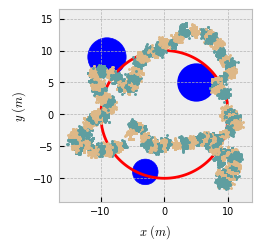

In [7]:
fig, ax= plt.subplots(figsize=(FigWidth,FigHeight))
Constraintsplot(ax)
T=100
cida.initialize(x0, Cov0)
x_true = cida.particles[:,random.sample(range(0, cida.num_particles), 1)]
AlphaAchieved_CE = np.zeros((T+1,))
#ax.set_xlim((-15,15))
#ax.set_ylim((-15,15))
for k in range(T):
    print(k)
    AlphaAchieved_CE[k] = cida.ViolationProb()
    uSharp = Controller(cida.sampleAverage())
    ax.plot(cida.particles[0,:],cida.particles[1,:],'o', markersize=1.1,color=list(colors.cnames)[k%2+12], zorder=2)
    y = measurementDynamics(x_true, uSharp) + sqrtm(R).real @ np.random.randn(ry, 1)
    print(cida.sampleAverage())
    cida.Apply_PF(uSharp, y)
    x_true = stateDynamics(x_true, uSharp, sqrtm(Q).real @ np.random.randn(rx,))

plt.savefig('Figures/CBF_and_CE.pdf',bbox_inches ="tight")

AlphaAchieved_CE[T]=cida.ViolationProb()   

plt.show()




0
[[ 9.97729196]
 [ 0.17685463]
 [-0.59281897]]
1
[[10.25280511]
 [-0.7935923 ]
 [-1.37602704]]
2
[[10.84247019]
 [-0.94434667]
 [-1.22867374]]
3
[[11.17316065]
 [-1.56910517]
 [-1.46428311]]
4
[[12.30871135]
 [-1.88079928]
 [-1.23504532]]
5
[[12.88561164]
 [-2.87828893]
 [-1.62279235]]
6
[[13.10954385]
 [-3.42261939]
 [-1.87483638]]
7
[[13.90539715]
 [-4.21283041]
 [-1.68295382]]
8
[[13.75308223]
 [-4.95182893]
 [-2.04016649]]
9
[[12.6894195 ]
 [-6.07481233]
 [-1.86052215]]
10
[[11.79632309]
 [-6.26609722]
 [ 0.015629  ]]
11
[[11.09285776]
 [-5.50077279]
 [ 0.12254338]]
12
[[10.05512493]
 [-5.86627339]
 [-2.1119333 ]]
13
[[10.01427039]
 [-5.54067856]
 [-0.35421382]]
14
[[ 9.81345292]
 [-6.36149286]
 [-2.01343064]]
15
[[ 9.14522858]
 [-6.72915114]
 [-1.95463515]]
16
[[ 9.06734245]
 [-8.18627539]
 [-1.80920888]]
17
[[ 8.28277604]
 [-8.63001418]
 [-1.4675242 ]]
18
[[ 7.93218017]
 [-9.33866066]
 [-2.30122479]]
19
[[  6.70905912]
 [-10.08403625]
 [ -1.94076126]]
20
[[  5.47793032]
 [-11.09

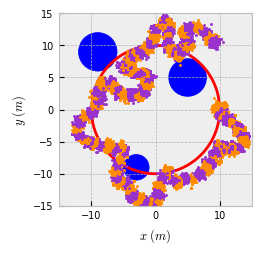

In [8]:
fig, ax= plt.subplots(figsize=(FigWidth,FigHeight))
Constraintsplot(ax)
T=100
cida.initialize(x0, Cov0)
x_true = cida.particles[:,random.sample(range(0, cida.num_particles), 1)]
AlphaAchieved_cida = np.zeros((T+1,))
ax.set_xlim((-15,15))
ax.set_ylim((-15,15))
for k in range(T):
    print(k)
    AlphaAchieved_cida[k] = cida.ViolationProb()
    uSharp = cida.RandomSearch()
    ax.plot(cida.particles[0,:],cida.particles[1,:],'o', markersize=1.1,color=list(colors.cnames)[k%2 +30], zorder=2)
    y = measurementDynamics(x_true, uSharp) + sqrtm(R).real @ np.random.randn(ry, 1)
    print(cida.sampleAverage())
    cida.Apply_PF(uSharp, y)
    x_true = stateDynamics(x_true, uSharp, sqrtm(Q).real @ np.random.randn(rx,))

plt.savefig('Figures/CBF_and_CIDAR.pdf',bbox_inches ="tight")

AlphaAchieved_cida[T]=cida.ViolationProb()   

plt.show()




In [9]:
print(AlphaAchieved_cida)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00333333
 0.         0.         0.         0.00333333 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02       0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

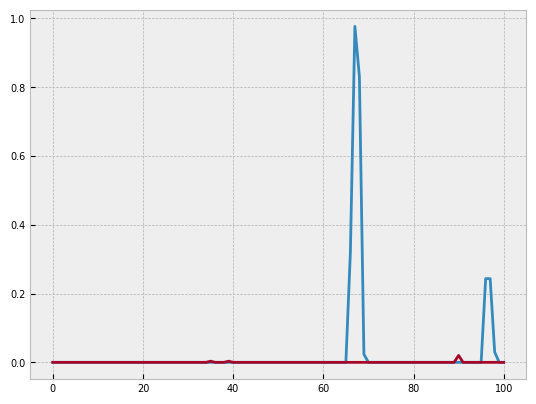

In [12]:
plt.plot(AlphaAchieved_CE)
plt.plot(AlphaAchieved_cida)

In [11]:
#With particle filter conditional mean
Constraintsplot()
#x=[2,4,4,-2,-2,2,2]
#y=[4,4,-6,-6,-4,-4,4]
#plt.plot(x,y)
plt.plot(0,0,'.')
AlphaAchievedCM=np.full((1,T+1), np.nan)
plt.axis('equal')
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
plt.xlabel('$z_k$', fontsize=9)  
plt.ylabel('$h_k$', fontsize=9) 
#plt.xlabel('$z_k^{\prime\prime}$')  
#plt.ylabel('$h_k^{\prime\prime}$') 
Xi=Xi0
x_true=np.full((2,T+1), np.nan)
x_true[:,0]=(mu_x0+np.sqrt(var_x0)@np.random.randn(2, 1)).reshape(2,)
for k in range(T):
    AlphaAchievedCM[0,k]=AchievedAlpha(Xi)
    x0mean=np.sum(Xi, axis=1)/L
    plt.plot(Xi[0,:],Xi[1,:],'o', markersize=1.1,color=list(colors.cnames)[k+22],zorder=2)
    plt.plot(x0mean[0],x0mean[1],marker='s',ms=4, color = 'black' ,mfc=list(colors.cnames)[k+22], zorder=3)
    u=controller(x0mean)
    Xiplus, gx=TimeUpdate(Xi,var_w,var_v,u)
    y=x_true[0,k]+np.sqrt(var_v)[0,0]*np.random.randn()
    disturbance_k=np.sqrt(var_w)@np.random.randn(2, 1)
    x_true[:,k+1]=(dynamics(x_true[:,k],u,disturbance_k)).reshape(2,)
    Likelihoods=Measurement_Likelihood(np.array([gx]),y,var_v[0,0])
    Xi=Resampler(Xiplus,Likelihoods)

AlphaAchievedCM[0,T]=AchievedAlpha(Xi)          
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
plt.rc('axes', labelsize=7) #fontsize of the x and y labels
plt.savefig('L_example_CM.pdf',bbox_inches ="tight")
plt.show()



TypeError: Constraintsplot() missing 1 required positional argument: 'ax'

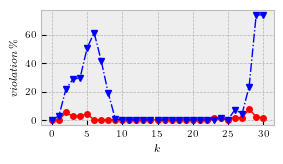

In [ ]:
# Generating the violation rates figure
plt.style.use('bmh')
plt.figure(figsize=(3.0,1.5))
plt.plot(AlphaAchieved[0,:]*100,'-or', linewidth=1, ms=4)
plt.plot(AlphaAchievedCM[0,:]*100,'-.vb', linewidth=1, ms=4)
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels

plt.xlabel('$k$', fontsize=8)  
plt.ylabel('$violation\,\%$', fontsize=8) 
plt.savefig('AchievedAlpha_StabilizingK.pdf',bbox_inches ="tight")

plt.show()